In [1]:
from Dataset.Dataset import CSVLoader
from compoundFeaturization.rdkitFingerprints import MorganFingerprint
from featureSelection.baseFeatureSelector import LowVarianceFS
from unsupervised.baseUnsupervised import PCA

In [2]:
dataset = CSVLoader('preprocessed_dataset_wfoodb.csv', 'Smiles', ['Class'], 'ID')#, chunk_size=5000)
dataset.get_shape()


(23290,) (23290,) (0,) (23290,)


((23290,), (23290,), (0,), (23290,))

In [3]:
#Featurization
dataset = MorganFingerprint().featurize(dataset)

Featurizing datapoint 0
Featurizing datapoint 1000
Featurizing datapoint 2000
Featurizing datapoint 3000
Featurizing datapoint 4000
Featurizing datapoint 5000
Featurizing datapoint 6000


RDKit ERROR: [10:20:02] Explicit valence for atom # 1 Cl, 4, is greater than permitted


error in smile: O=[Cl]=O
Featurizing datapoint 7000


RDKit ERROR: [10:20:05] Explicit valence for atom # 3 B, 4, is greater than permitted
RDKit ERROR: [10:20:05] Explicit valence for atom # 1 Cl, 9, is greater than permitted


error in smile: OB1O[B]2(O)OB(O)O[B](O)(O1)O2
error in smile: O=[Cl-](=O)(=O)=O
Featurizing datapoint 8000
Featurizing datapoint 9000
Featurizing datapoint 10000
Featurizing datapoint 11000
Featurizing datapoint 12000
Featurizing datapoint 13000
Featurizing datapoint 14000


RDKit ERROR: [10:20:19] Explicit valence for atom # 0 P, 11, is greater than permitted


error in smile: [P](OCC=C(C)C)(OCC=C(C)C)(=O)(OP(OCC=C(C)C)(OCC=C(C)C)=O)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)CC=C(C)C
Featurizing datapoint 15000
Featurizing datapoint 16000
Featurizing datapoint 17000
Featurizing datapoint 18000
Featurizing datapoint 19000
Featurizing datapoint 20000
Featurizing datapoint 21000
Featurizing datapoint 22000
Featurizing datapoint 23000
Elements with indexes:  [6257, 7708, 7709, 14244]  were removed due to the presence of NAs!
The elements in question are:  ['O=[Cl]=O' 'OB1O[B]2(O)OB(O)O[B](O)(O1)O2' 'O=[Cl-](=O)(=O)=O'
 '[P](OCC=C(C)C)(OCC=C(C)C)(=O)(OP(OCC=C(C)C)(OCC=C(C)C)=O)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)CC=C(C)C']


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [4]:
dataset.features

array([array([0., 0., 0., ..., 0., 0., 0.]),
       array([0., 0., 0., ..., 0., 0., 0.]),
       array([0., 0., 0., ..., 0., 0., 0.]), ...,
       array([0., 1., 0., ..., 0., 0., 0.]),
       array([0., 0., 0., ..., 0., 0., 0.]),
       array([0., 0., 0., ..., 0., 0., 0.])], dtype=object)

In [5]:
#Feature Selection
dataset = LowVarianceFS(0.05).featureSelection(dataset)

In [6]:
dataset.features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

????????????
2 Principal Components explain 34.55 % of the data variance.


TypeError: 'PCA' object is not subscriptable

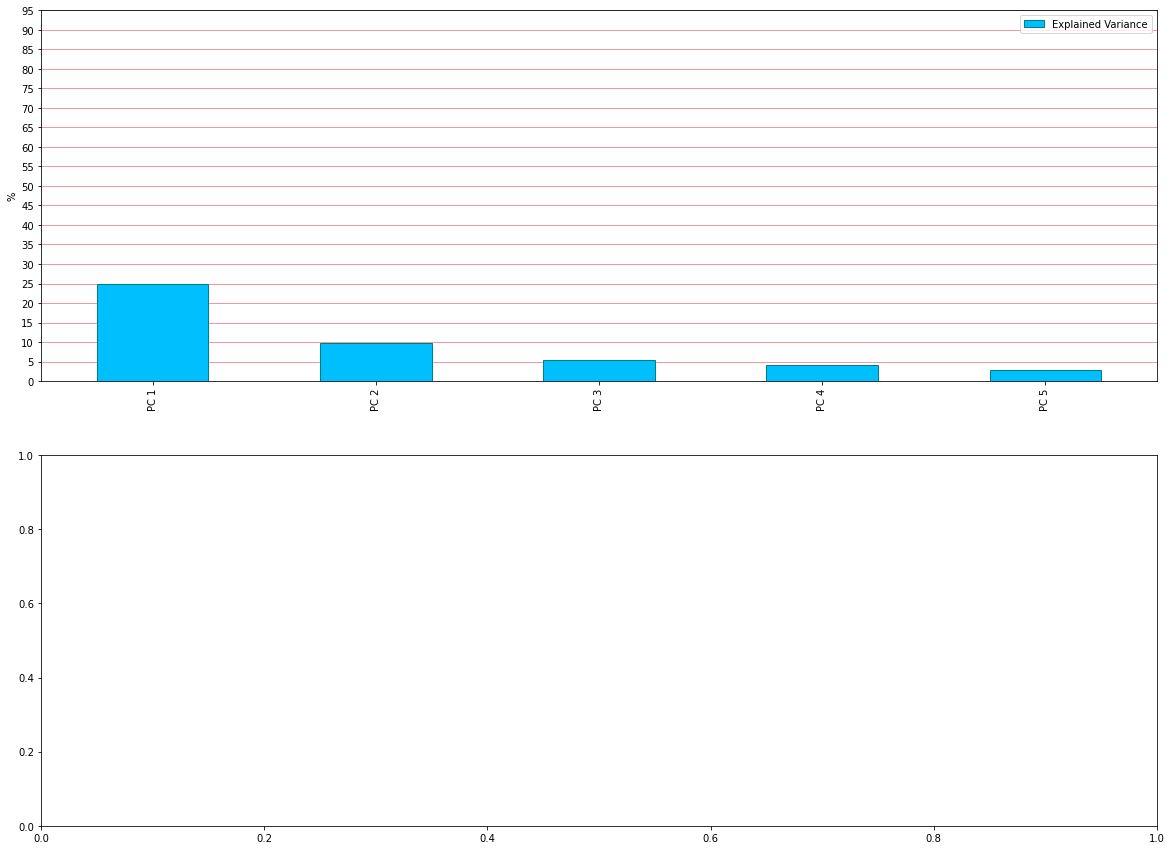

In [13]:
#PCA
pca = PCA().runUnsupervised(dataset)